In [8]:
import sklearn,sklearn.datasets
import sklearn.tree
import numpy,utils


## Randomforest

In [9]:
bosten  = sklearn.datasets.load_boston()


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [19]:
len(bosten.data)

506

In [23]:
print(bosten.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth=5)
strain,stest = utils.benchmark(regressor,bosten)
print('training: %.3f | test score: %.3f'%(strain,stest))

training: 0.938 | test score: 0.731


In [11]:
for d in range(1,10):
    regressor = sklearn.tree.DecisionTreeRegressor(max_depth=d)
    strain,stest = utils.benchmark(regressor,bosten)
    print('depth: %d | training score: %.3f | test score: %.3f'%
                                                 (d,strain,stest))

depth: 1 | training score: 0.479 | test score: 0.382
depth: 2 | training score: 0.717 | test score: 0.630
depth: 3 | training score: 0.835 | test score: 0.684
depth: 4 | training score: 0.904 | test score: 0.722
depth: 5 | training score: 0.938 | test score: 0.724
depth: 6 | training score: 0.962 | test score: 0.724
depth: 7 | training score: 0.976 | test score: 0.714
depth: 8 | training score: 0.986 | test score: 0.712
depth: 9 | training score: 0.992 | test score: 0.710


In [12]:
class RandomForestRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self,max_depth=None,nb_trees=10):
        self.trees = [sklearn.tree.DecisionTreeRegressor(max_depth=max_depth)
                      for _ in range(nb_trees)]
    
    def fit(self,X,y):
        for i, tree in enumerate(self.trees):
            tree.fit(*utils.split(X,y,seed=i)[0])
        
    def predict(self,X):
       return numpy.array([tree.predict(X) for tree in self.trees]).mean(axis=0)

In [13]:
# Benchmark for baseline decision tree model
regressor = sklearn.tree.DecisionTreeRegressor(max_depth=7)
strain,stest = utils.benchmark(regressor,bosten)
print("decision tree (optimal depth): | train: %.3f | test: %.3f"%
      (strain,stest))

# Benchmark for the random forest model with a growing number of trees
for nb_trees in [1,2,4,8,16,32]:
    regressor = RandomForestRegressor(max_depth=9,nb_trees=nb_trees)
    strain,stest = utils.benchmark(regressor,bosten)
    print("random forest with %2d tree(s): | train: %.3f | test: %.3f"%
          (nb_trees,strain,stest))

decision tree (optimal depth): | train: 0.976 | test: 0.710
random forest with  1 tree(s): | train: 0.805 | test: 0.632
random forest with  2 tree(s): | train: 0.883 | test: 0.740
random forest with  4 tree(s): | train: 0.920 | test: 0.792
random forest with  8 tree(s): | train: 0.937 | test: 0.813
random forest with 16 tree(s): | train: 0.947 | test: 0.827
random forest with 32 tree(s): | train: 0.951 | test: 0.832


In [26]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Load the Boston Housing dataset
boston = load_boston()

c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [27]:

X, y = boston.data, boston.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
depths = [3, 4, 5, 6, 7, 8, 9, 10]
train_errors = []
test_errors = []


In [29]:

import numpy as np
for depth in depths:
    model = xgb.XGBRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_errors.append(train_error)
    test_errors.append(test_error)


In [33]:
train_errors

[0.710973506382818,
 0.25521593588366737,
 0.09227158658101361,
 0.02007237004920757,
 0.005161337386610211,
 0.0011597893634531825,
 0.0007961466692823239,
 0.0009115373872303902]

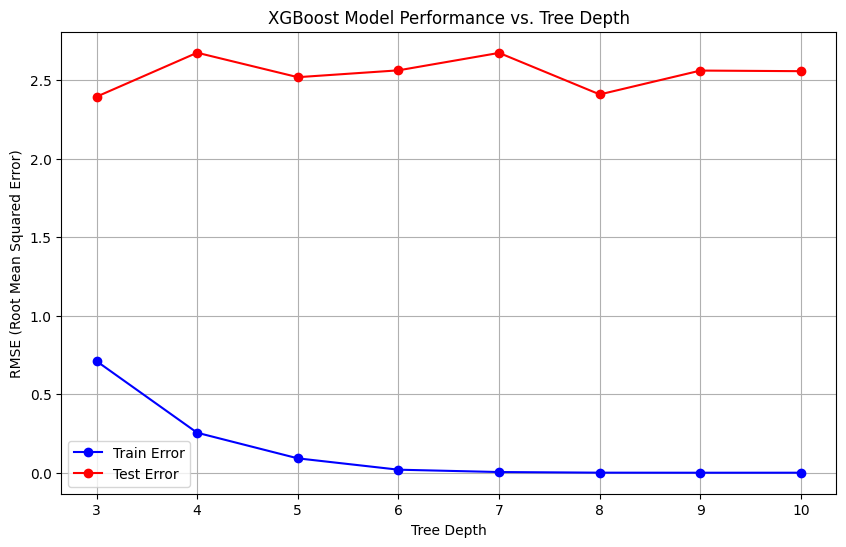

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(depths, test_errors, marker='o', label='Test Error', color='red')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('XGBoost Model Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Define a list of tree counts to test
tree_counts = [10, 50, 100, 200, 250]

# Perform cross-validation for each tree count
for n_trees in tree_counts:
    model = xgb.XGBRegressor(n_estimators=n_trees)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    mean_rmse = rmse.mean()
    
    print(f"Number of Trees: {n_trees}, Mean RMSE: {mean_rmse:.4f}")


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

Number of Trees: 10, Mean RMSE: 4.5106
Number of Trees: 50, Mean RMSE: 4.2503
Number of Trees: 100, Mean RMSE: 4.2513
Number of Trees: 200, Mean RMSE: 4.2511
Number of Trees: 250, Mean RMSE: 4.2511


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

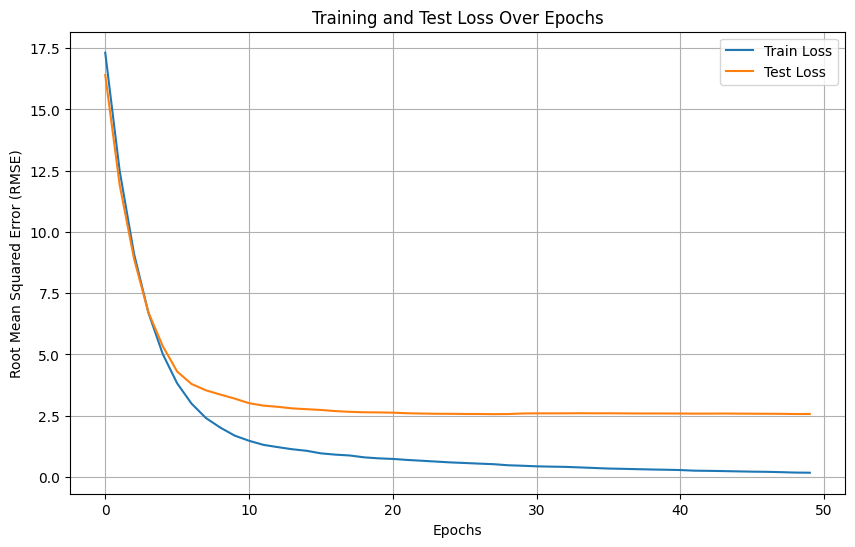

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=50)

# Lists to store the training and test losses
train_losses = []
test_losses = []

# Train the XGBoost model and monitor loss
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric="rmse", verbose=False)

# Extract loss information from the model
results = model.evals_result()
train_losses = results["validation_0"]["rmse"]
test_losses = results["validation_1"]["rmse"]

# Plot the training and test losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.title('Training and Test Loss Over Epochs')
plt.grid(True)
plt.show()


In [52]:
X_test.shape

(102, 13)

In [55]:
pre_res=model.predict(X_test)
pre_res.shape

(102,)

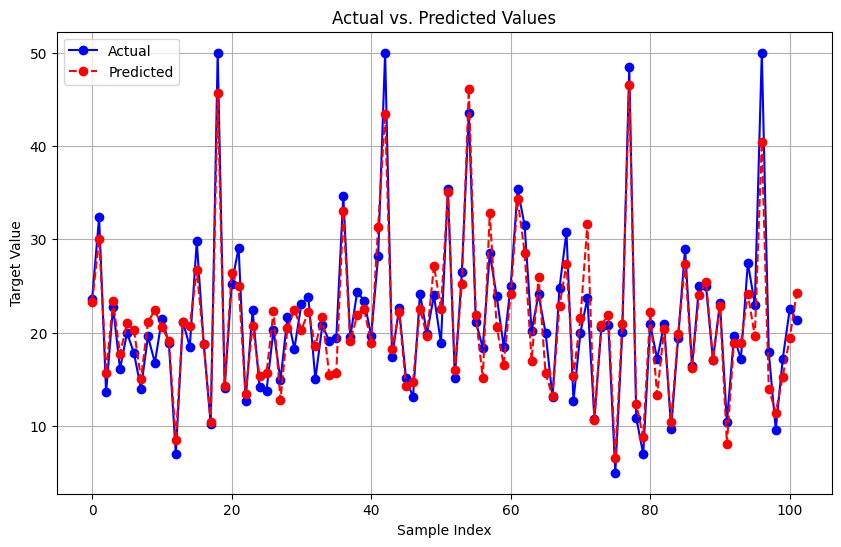

In [58]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost model and have `model` defined


# Create a list of sample indices (0 to 9) for labeling
sample_indices = list(range(len(y_test)))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_test, marker='o', linestyle='-', label='Actual', color='b')
plt.plot(sample_indices, pre_res, marker='o', linestyle='--', label='Predicted', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()